In [6]:
import spacy 
from spacy import displacy
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
#!python -m spacy download en_core_web_trf
#!python3 -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')




In [2]:
import os

In [3]:
all_doc=[d for d in os.scandir('datatext') if '.txt' in d.name]
all_doc

[<DirEntry 'Cinderella.txt'>, <DirEntry 'Cinderella1.txt'>]

In [7]:
t=all_doc[0]
t_text=open(t).read()
t_doc=nlp(t_text)
#visualize
displacy.render(t_doc,style="ent", jupyter=True)

In [8]:
#Tokenization
for tok in t_doc:
    print(tok.text)

There
was
once
a
rich
man
,
Joseph
 
whose
wife
,
Sarah
lay
sick
,
and
when
she
felt
her
end
drawing
near
she
called
to
her
only
daughter
,
Cinderella
to
come
near
her
bed
,
and
said
,
"
Dear
child
,
be
pious
and
good
,
and
God
will
always
take
care
of
you
,
and
I
will
look
down
upon
you
from
heaven
,
and
will
be
with
you
.
"
And
then
she
closed
her
eyes
and
expired
.
The
maiden
went
every
day
to
her
mother
's
grave
and
wept
,
and
was
always
pious
and
good
.
When
the
winter
came
the
snow
covered
the
grave
with
a
white
covering
,
and
when
the
sun
came
in
the
early
spring
and
melted
it
away
,
Joseph
married
to
another
new
wife
,
Edith
.
Her
two
daughters
,
Grizella
and
Drizella
came
along
with
her
.
They
became
Step
-
mother
and
Step
.
Sisters
for
Cinderella
.


They
were
very
ugly
.
She
got
up
every
morning
at
six
o'clock
,
then
she
made
breakfast
for
her
sisters
,
and
afterwards
she
cleaned
the
house
.
She
worked
all
day
.
Her
two
ugly
sisters
were
very
lazy
;
they
never
did
any
work
b

In [9]:
#POS Tagging
for token in t_doc:
    print(f"{token.text} --- POS: {token.pos_}, {token.tag_}")


There --- POS: PRON, EX
was --- POS: VERB, VBD
once --- POS: ADV, RB
a --- POS: DET, DT
rich --- POS: ADJ, JJ
man --- POS: NOUN, NN
, --- POS: PUNCT, ,
Joseph --- POS: PROPN, NNP
  --- POS: SPACE, _SP
whose --- POS: DET, WP$
wife --- POS: NOUN, NN
, --- POS: PUNCT, ,
Sarah --- POS: PROPN, NNP
lay --- POS: VERB, VBD
sick --- POS: ADJ, JJ
, --- POS: PUNCT, ,
and --- POS: CCONJ, CC
when --- POS: SCONJ, WRB
she --- POS: PRON, PRP
felt --- POS: VERB, VBD
her --- POS: PRON, PRP$
end --- POS: NOUN, NN
drawing --- POS: VERB, VBG
near --- POS: ADP, IN
she --- POS: PRON, PRP
called --- POS: VERB, VBD
to --- POS: ADP, IN
her --- POS: PRON, PRP$
only --- POS: ADJ, JJ
daughter --- POS: NOUN, NN
, --- POS: PUNCT, ,
Cinderella --- POS: PROPN, NNP
to --- POS: PART, TO
come --- POS: VERB, VB
near --- POS: ADP, IN
her --- POS: PRON, PRP$
bed --- POS: NOUN, NN
, --- POS: PUNCT, ,
and --- POS: CCONJ, CC
said --- POS: VERB, VBD
, --- POS: PUNCT, ,
" --- POS: PUNCT, ``
Dear --- POS: ADJ, JJ
child --- POS: N

In [11]:
#Dependency Parsing
for token in t_doc:
    print(f"{token.text} --- dependency label: {token.dep_}")


There --- dependency label: expl
was --- dependency label: ROOT
once --- dependency label: advmod
a --- dependency label: det
rich --- dependency label: amod
man --- dependency label: attr
, --- dependency label: punct
Joseph --- dependency label: appos
  --- dependency label: dep
whose --- dependency label: poss
wife --- dependency label: conj
, --- dependency label: punct
Sarah --- dependency label: nsubj
lay --- dependency label: conj
sick --- dependency label: acomp
, --- dependency label: punct
and --- dependency label: cc
when --- dependency label: advmod
she --- dependency label: nsubj
felt --- dependency label: advcl
her --- dependency label: poss
end --- dependency label: nsubj
drawing --- dependency label: ccomp
near --- dependency label: prep
she --- dependency label: nsubj
called --- dependency label: conj
to --- dependency label: prep
her --- dependency label: poss
only --- dependency label: amod
daughter --- dependency label: pobj
, --- dependency label: punct
Cinderella 

In [12]:
#Stopwords
for token in t_doc:
    print(f"{token.text} --- is stopword: {token.is_stop}")



There --- is stopword: True
was --- is stopword: True
once --- is stopword: True
a --- is stopword: True
rich --- is stopword: False
man --- is stopword: False
, --- is stopword: False
Joseph --- is stopword: False
  --- is stopword: False
whose --- is stopword: True
wife --- is stopword: False
, --- is stopword: False
Sarah --- is stopword: False
lay --- is stopword: False
sick --- is stopword: False
, --- is stopword: False
and --- is stopword: True
when --- is stopword: True
she --- is stopword: True
felt --- is stopword: False
her --- is stopword: True
end --- is stopword: False
drawing --- is stopword: False
near --- is stopword: False
she --- is stopword: True
called --- is stopword: False
to --- is stopword: True
her --- is stopword: True
only --- is stopword: True
daughter --- is stopword: False
, --- is stopword: False
Cinderella --- is stopword: False
to --- is stopword: True
come --- is stopword: False
near --- is stopword: False
her --- is stopword: True
bed --- is stopword

In [13]:
#Lemmatization
for token in t_doc:
    print(f"{token.text} --- lemma: {token.lemma_}")


There --- lemma: there
was --- lemma: be
once --- lemma: once
a --- lemma: a
rich --- lemma: rich
man --- lemma: man
, --- lemma: ,
Joseph --- lemma: Joseph
  --- lemma:  
whose --- lemma: whose
wife --- lemma: wife
, --- lemma: ,
Sarah --- lemma: Sarah
lay --- lemma: lie
sick --- lemma: sick
, --- lemma: ,
and --- lemma: and
when --- lemma: when
she --- lemma: she
felt --- lemma: feel
her --- lemma: her
end --- lemma: end
drawing --- lemma: draw
near --- lemma: near
she --- lemma: she
called --- lemma: call
to --- lemma: to
her --- lemma: her
only --- lemma: only
daughter --- lemma: daughter
, --- lemma: ,
Cinderella --- lemma: Cinderella
to --- lemma: to
come --- lemma: come
near --- lemma: near
her --- lemma: her
bed --- lemma: bed
, --- lemma: ,
and --- lemma: and
said --- lemma: say
, --- lemma: ,
" --- lemma: "
Dear --- lemma: dear
child --- lemma: child
, --- lemma: ,
be --- lemma: be
pious --- lemma: pious
and --- lemma: and
good --- lemma: good
, --- lemma: ,
and --- lemma: an

In [14]:
# Named Entity Recognition (NER)

for ent in t_doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Joseph 27 33 PERSON
Sarah 47 52 PERSON
Cinderella 135 145 PERSON
winter 454 460 DATE
the early spring 541 557 DATE
Joseph 578 584 PERSON
Edith 614 619 PERSON
two 625 628 CARDINAL
Grizella 640 648 PERSON
Drizella 653 661 PERSON
Step 711 715 PERSON
Cinderella 728 738 PERSON
every morning 772 785 TIME
six o'clock 789 800 TIME
all day 892 899 DATE
two 905 908 CARDINAL
Cinderella 970 980 PERSON
Cinderella 997 1007 PERSON
The King Charles 1051 1067 PERSON
Prince Henry 1085 1097 PERSON
One day 1132 1139 DATE
Cinderella 1180 1190 PERSON
Grizella 1201 1209 PERSON
three 1250 1255 CARDINAL
the Prince Henry's 1282 1300 FAC
Drizella 1417 1425 PERSON
Cinderella 1459 1469 PERSON


In [15]:
#Word embeddings
nlp1 = spacy.load("en_core_web_md")
t_doc1=nlp1(t_text)
vectors = []
for token in t_doc1 :
    print(token.text, token.has_vector, token.is_oov)
    vectors.append(token.vector)

There True False
was True False
once True False
a True False
rich True False
man True False
, True False
Joseph True False
  False True
whose True False
wife True False
, True False
Sarah True False
lay True False
sick True False
, True False
and True False
when True False
she True False
felt True False
her True False
end True False
drawing True False
near True False
she True False
called True False
to True False
her True False
only True False
daughter True False
, True False
Cinderella True False
to True False
come True False
near True False
her True False
bed True False
, True False
and True False
said True False
, True False
" True False
Dear True False
child True False
, True False
be True False
pious True False
and True False
good True False
, True False
and True False
God True False
will True False
always True False
take True False
care True False
of True False
you True False
, True False
and True False
I True False
will True False
look True False
down True False
upon True False


In [16]:
print(vectors[0])

[ 1.4265e+00  1.7465e+00 -3.8454e+00  2.3394e+00  5.6968e-01  2.4895e+00
 -1.9144e+00  1.0379e+01 -1.8842e+00  4.7404e+00  3.3739e+00 -2.5410e+00
 -5.4867e+00  1.7710e+00  6.9627e+00 -2.6030e-01  7.8050e-01 -4.6908e+00
 -3.0322e-01 -2.4174e+00 -1.8541e+00  4.2985e+00  8.8064e-01 -1.9976e+00
  2.1518e+00 -4.8125e+00  1.7905e+00 -1.9301e+00  1.1569e+00  3.8659e+00
  6.7124e+00 -6.5679e+00 -4.7684e+00 -2.3003e+00 -1.1853e+00 -2.1670e+00
 -2.0113e+00  8.4155e-01  3.8610e+00  3.2999e+00  1.3615e+00 -2.0578e+00
 -2.2157e-01  2.3783e+00 -3.0487e+00  1.7703e-03  5.8008e-01  1.7903e+00
 -2.5363e+00  3.6579e-01  2.0229e+00  2.1913e+00 -9.2889e-01 -3.4266e+00
 -1.3675e+00  3.8819e+00  6.0020e+00  1.2984e+00  3.8109e+00 -1.3450e+00
 -5.0244e+00  1.9678e+00 -1.6486e+00 -2.6161e+00  4.0840e-01  5.8589e+00
 -1.0099e+01 -3.0061e+00 -2.3833e-01  5.8070e+00 -1.4701e+00 -2.3484e+00
 -6.5882e+00 -1.9408e+00 -2.9377e+00  2.3218e+00 -2.5646e-01  3.2507e+00
  2.4261e+00  3.4950e+00 -2.1161e+00 -4.0672e+00  6

In [17]:
t=all_doc[0]
t_text=open(t).read()
t_doc=nlp1(t_text)
t1=all_doc[1]
t1_text=open(t1).read()
t1_doc=nlp1(t1_text)

print(t_doc.similarity(t1_doc))

0.9633370200638077


In [18]:
entities = [(ent.text, ent.label_) for ent in t_doc.ents]  # Extract entities and labels

df = pd.DataFrame(entities, columns=["Entity", "Label"])  # Create DataFrame

print(df)

                Entity        Label
0               Joseph       PERSON
1                Sarah       PERSON
2           Cinderella       PERSON
3           the winter         DATE
4     the early spring         DATE
5               Joseph       PERSON
6                Edith       PERSON
7                  two     CARDINAL
8             Grizella       PERSON
9             Drizella       PERSON
10          Cinderella       PERSON
11       every morning         TIME
12         six o'clock         TIME
13             all day         DATE
14                 two     CARDINAL
15          Cinderella       PERSON
16          Cinderella       PERSON
17        Prince Henry       PERSON
18             One day         DATE
19          Cinderella       PERSON
20            Grizella       PERSON
21               three     CARDINAL
22  the Prince Henry's          FAC
23           Fantastic  WORK_OF_ART
24            Drizella       PERSON
25          Cinderella       PERSON


In [20]:
# for d in os.scandir('datatext') :
#     t[d]=all_doc[d]
#     t_text[d]=open(t[d]).read()
#     t_doc[d]=nlp1(t_text[d])
#     entities = [(ent.text, ent.label_) for ent in t_doc [d].ents]  # Extract entities and labels
#     df = pd.DataFrame(entities, columns=["Entity", "Label"])  # Create DataFrame

# # print(df)
# all_doc=[d for d in os.scandir('datatext') if '.txt' in d.name]

def process_text(file):
    with open(file, "r") as f:
        text = f.read()
    doc = nlp(text)  # Process the text with the NER model
    entities = [(ent.text, ent.label_) for ent in doc.ents]  # Extract entities and labels
    return entities

all_doc=[d for d in os.scandir('datatext') if '.txt' in d.name]
enti0=process_text(all_doc[0])
enti1=process_text(all_doc[1])
  

df1 = pd.DataFrame(enti0, columns=["Entity", "Label"])  # Create DataFrame for file1
df2 = pd.DataFrame(enti1, columns=["Entity", "Label"])  # Create DataFrame for file2

print("Entities in file1:")
print(df1)

print("\nEntities in file2:")
print(df2)
df12 = pd.concat([df1, df2], ignore_index=True)
df12.to_csv("ex_table.csv",index=False)


Entities in file1:
                Entity     Label
0               Joseph    PERSON
1                Sarah    PERSON
2           Cinderella    PERSON
3               winter      DATE
4     the early spring      DATE
5               Joseph    PERSON
6                Edith    PERSON
7                  two  CARDINAL
8             Grizella    PERSON
9             Drizella    PERSON
10                Step    PERSON
11          Cinderella    PERSON
12       every morning      TIME
13         six o'clock      TIME
14             all day      DATE
15                 two  CARDINAL
16          Cinderella    PERSON
17          Cinderella    PERSON
18    The King Charles    PERSON
19        Prince Henry    PERSON
20             One day      DATE
21          Cinderella    PERSON
22            Grizella    PERSON
23               three  CARDINAL
24  the Prince Henry's       FAC
25            Drizella    PERSON
26          Cinderella    PERSON

Entities in file2:
                 Entity     Label
0  

In [22]:




check_df=pd.read_csv("ex_table.csv")
#df_extable[df_extable["Label"] =="PERSON"]
check_df
df_extable=check_df[check_df["Label"] =="PERSON"]
df_extable
df_extable.to_csv("onlyPERSON_table.csv",index=False)

In [24]:
pd.crosstab(check_df["Label"], check_df["Entity"]) 

Entity,12 o'clock,8 o'clock,Cinderella,Drizella,Edith,Fairy Godmother,Grizella,Jeni,Joseph,One day,...,an hour,every morning,first,six o'clock,the Prince Henry's,the early spring,the week,three,two,winter
Label,,,,,,,,,,,,,,,,,,,,,
CARDINAL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,0
DATE,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
FAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
ORDINAL,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ORG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PERSON,0,0,20,2,1,1,2,1,2,0,...,0,0,0,0,0,0,0,0,0,0
TIME,2,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0


In [25]:
df_extable.info()
df_extable

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  34 non-null     object
 1   Label   34 non-null     object
dtypes: object(2)
memory usage: 816.0+ bytes


,Entity,Label
0,Joseph,PERSON
1,Sarah,PERSON
2,Cinderella,PERSON
5,Joseph,PERSON
6,Edith,PERSON
8,Grizella,PERSON
9,Drizella,PERSON
10,Step,PERSON
11,Cinderella,PERSON
16,Cinderella,PERSON


In [26]:
pd.crosstab(df_extable["Label"], df_extable["Entity"]) 

Entity,Cinderella,Drizella,Edith,Fairy Godmother,Grizella,Jeni,Joseph,Prince Henry,Sam,Sarah,Step,The King Charles
Label,,,,,,,,,,,,
PERSON,20,2,1,1,2,1,2,1,1,1,1,1


In [27]:
import re
names_df=pd.read_csv("onlyPERSON_table.csv")
names_df['firstname']=names_df['Entity'].apply(lambda x: x.split(' ', 1)[0])
names_df['lastname']=names_df['Entity'].apply(lambda x: x.split(' ',2)[-1])
names_df

,Entity,Label,firstname,lastname
0,Joseph,PERSON,Joseph,Joseph
1,Sarah,PERSON,Sarah,Sarah
2,Cinderella,PERSON,Cinderella,Cinderella
3,Joseph,PERSON,Joseph,Joseph
4,Edith,PERSON,Edith,Edith
5,Grizella,PERSON,Grizella,Grizella
6,Drizella,PERSON,Drizella,Drizella
7,Step,PERSON,Step,Step
8,Cinderella,PERSON,Cinderella,Cinderella
9,Cinderella,PERSON,Cinderella,Cinderella


In [28]:
#check sentences and compare with table 
sent_en_df=[]
for sent in t_doc.sents:
    en_list=[ent.text for ent in sent.ents]
    sent_en_df.append({"sentence":sent,"entities":en_list})

sent_en_df=pd.DataFrame(sent_en_df)
sent_en_df

,sentence,entities
0,"(There, was, once, a, rich, man, ,, Joseph, ,...","[Joseph, Sarah, Cinderella]"
1,"(And, then, she, closed, her, eyes, and, expir...",[]
2,"(The, maiden, went, every, day, to, her, mothe...",[]
3,"(When, the, winter, came, the, snow, covered, ...","[the winter, the early spring, Joseph, Edith]"
4,"(Her, two, daughters, ,, Grizella, and, Drizel...","[two, Grizella, Drizella]"
5,"(They, became, Step, -, mother, and, Step, .)",[]
6,"(Sisters, for, Cinderella, ., \n)",[Cinderella]
7,"(They, were, very, ugly, .)",[]
8,"(She, got, up, every, morning, at, six, o'cloc...","[every morning, six o'clock]"
9,"(She, worked, all, day, .)",[all day]


In [29]:
def filter_en(en_list,names_df):
    return [ent for ent in en_list
            if ent in list(names_df.firstname)]

sent_en_df['names_entities']=sent_en_df['entities'].apply(lambda x:filter_en(x,names_df))
sent_en_dffiltered=sent_en_df[sent_en_df['entities'].map(len)>0]
sent_en_dffiltered

,sentence,entities,names_entities
0,"(There, was, once, a, rich, man, ,, Joseph, ,...","[Joseph, Sarah, Cinderella]","[Joseph, Sarah, Cinderella]"
3,"(When, the, winter, came, the, snow, covered, ...","[the winter, the early spring, Joseph, Edith]","[Joseph, Edith]"
4,"(Her, two, daughters, ,, Grizella, and, Drizel...","[two, Grizella, Drizella]","[Grizella, Drizella]"
6,"(Sisters, for, Cinderella, ., \n)",[Cinderella],[Cinderella]
8,"(She, got, up, every, morning, at, six, o'cloc...","[every morning, six o'clock]",[]
9,"(She, worked, all, day, .)",[all day],[]
10,"(Her, two, ugly, sisters, were, very, lazy, ;,...","[two, Cinderella]",[Cinderella]
11,"(Cinderella, was, very, unhappy, ., \n)",[Cinderella],[Cinderella]
12,"(The, country, was, ruled, by, The, King, Char...",[Prince Henry],[]
13,"(One, day, ,, the, postman, came, to, the, hou...",[One day],[]


In [30]:
window_size=5
reln=[]

for i in range(sent_en_dffiltered.index[-1]):
    end_i=min(i+5,sent_en_dffiltered.index[-1])
    names_list=sum((sent_en_dffiltered.loc[i:end_i].names_entities),[])
    names_list

    names_uni=[names_list[i] for i in range(len(names_list)) if (i==0) or names_list[i] !=names_list[i-1]]  
    if len(names_uni)>1:
        for idx,a in enumerate(names_uni[:-1]):  # iterate utill before the last name in the list to compare
            b=names_uni[idx+1]
            reln.append({"src":a,"dest":b})


reln_df=pd.DataFrame(reln)
reln_df

,src,dest
0,Joseph,Sarah
1,Sarah,Cinderella
2,Cinderella,Joseph
3,Joseph,Edith
4,Edith,Grizella
5,Grizella,Drizella
6,Joseph,Edith
7,Edith,Grizella
8,Grizella,Drizella
9,Drizella,Cinderella


In [32]:
#sorting

reln_df=pd.DataFrame(np.sort(reln_df.values,axis=1),columns=reln_df.columns)
reln_df

,src,dest
0,Joseph,Sarah
1,Cinderella,Sarah
2,Cinderella,Joseph
3,Edith,Joseph
4,Edith,Grizella
5,Drizella,Grizella
6,Edith,Joseph
7,Edith,Grizella
8,Drizella,Grizella
9,Cinderella,Drizella


In [33]:
#relationbetween
reln_df['value']=1
reln_df=reln_df.groupby(['src','dest'],sort=False, as_index=False).sum()
reln_df

,src,dest,value
0,Joseph,Sarah,1
1,Cinderella,Sarah,1
2,Cinderella,Joseph,1
3,Edith,Joseph,4
4,Edith,Grizella,4
5,Drizella,Grizella,7
6,Cinderella,Drizella,9
7,Cinderella,Grizella,6


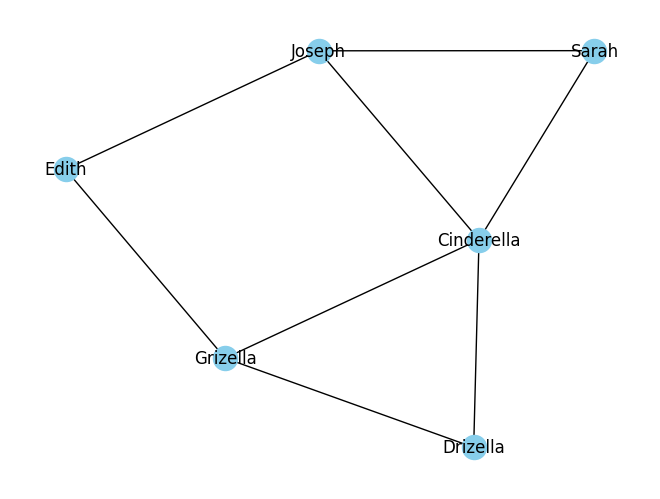

In [34]:
g=nx.from_pandas_edgelist(reln_df, source="src",target="dest",edge_attr="value",create_using=nx.Graph())
s=nx.kamada_kawai_layout(g)
nx.draw(g,with_labels=True,node_color='skyblue',edge_cmap=plt.cm.Blues,pos=s)
plt.show()

In [35]:
from pyvis.network import Network

net=Network(notebook=True,cdn_resources='remote' , width="700px", height="700px",bgcolor='#222222',font_color='white')
net.from_nx(g)
net.show('rel.html',local=False,notebook=True)

rel.html


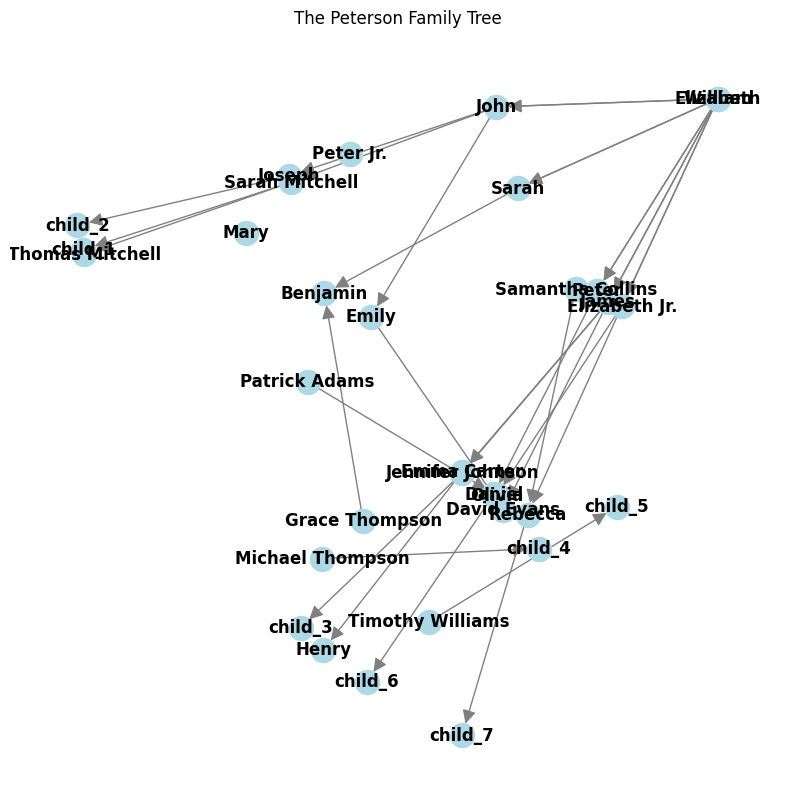

In [42]:
G = nx.DiGraph()

G.add_nodes_from(['William', 'Elizabeth'])
G.add_nodes_from(['John', 'James', 'Elizabeth Jr.', 'Peter', 'Sarah'])
G.add_nodes_from(['Sarah Mitchell', 'Joseph', 'Emily', 'Peter Jr.', 'Benjamin'])
G.add_nodes_from(['Thomas Mitchell', 'Mary', 'David Evans', 'Emma Carter', 'Jennifer Johnson', 'Patrick Adams'])
G.add_nodes_from(['Henry', 'Olivia', 'Daniel'])
G.add_nodes_from(['Michael Thompson', 'Samantha Collins', 'Rebecca', 'Grace Thompson', 'Timothy Williams'])

G.add_edges_from([('William', 'John'), ('William', 'James'), ('William', 'Elizabeth Jr.'), ('William', 'Peter'), ('William', 'Sarah')])
G.add_edges_from([('Elizabeth', 'John'), ('Elizabeth', 'James'), ('Elizabeth', 'Elizabeth Jr.'), ('Elizabeth', 'Peter'), ('Elizabeth', 'Sarah')])
G.add_edges_from([('John', 'Sarah Mitchell'), ('John', 'Joseph'), ('John', 'Emily'), ('James', 'David Evans'), ('James', 'Emma Carter'), ('James', 'Jennifer Johnson'), ('Elizabeth Jr.', 'Olivia'), ('Elizabeth Jr.', 'Rebecca'), ('Peter', 'Daniel'), ('Sarah', 'Benjamin')])
G.add_edges_from([('Sarah Mitchell', 'Thomas Mitchell'), ('Sarah Mitchell', 'child_1'), ('Joseph', 'child_2'), ('Emily', 'David Evans'), ('Emma Carter', 'Henry'), ('Jennifer Johnson', 'child_3'), ('Patrick Adams', 'Olivia'), ('Michael Thompson', 'child_4'),
                   ('Samantha Collins', 'Rebecca'), ('Timothy Williams', 'child_5'), ('Daniel', 'child_6'), ('Rebecca', 'child_7'), ('Grace Thompson', 'Benjamin')])

pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray', arrowsize=20)
plt.title("The Peterson Family Tree")
plt.axis('off')
plt.show()